**1. Importing the dependencies**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Data Loading**

In [3]:
dataset = "https://raw.githubusercontent.com/ADHULJITH/Customer-Churn-Prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(dataset)

**3. First 5 Rows**




In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**4. Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**5. Summary Statistics**

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**6. Checking Duplicates**

In [7]:
df.duplicated().sum()

np.int64(0)

**7. Missing Values**

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**7. Churn Count**

In [9]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**8. Churn Percentage**


In [10]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


**9. Churn Visualization**

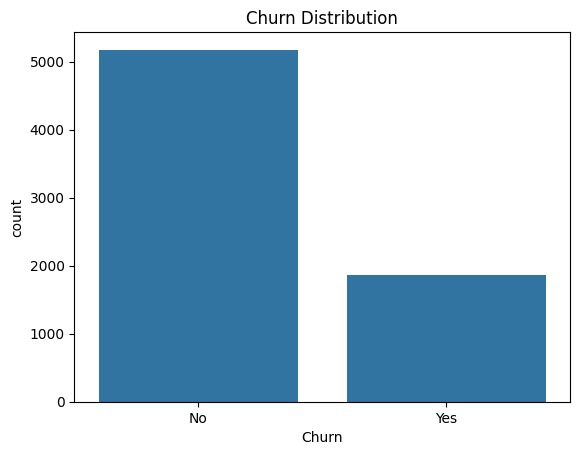

In [11]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

**10. Unique values in columns**

In [12]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


**11.Dropping ColumnId**

In [13]:
df.drop('customerID', axis=1, inplace=True)

**12. Categorical Columns**

In [23]:
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns (after dropping customerID):")
print(cat_cols)

Categorical Columns (after dropping customerID):
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


**13. Categorical Columns Frequency Distribution**

In [15]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

 Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

 OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

 OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

 DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

 TechSupport
TechSupport
No   

**13. Visualization of Categorical column**

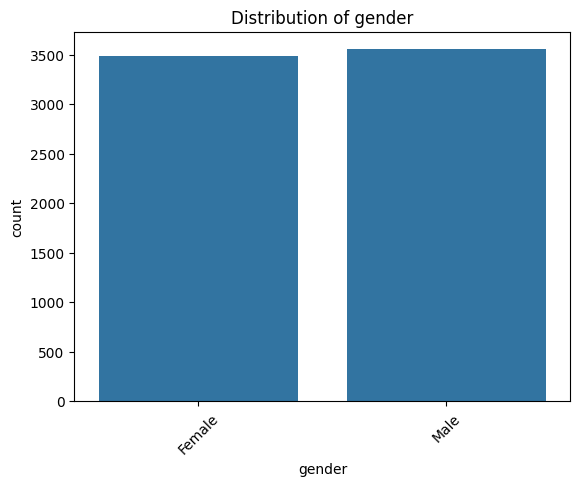

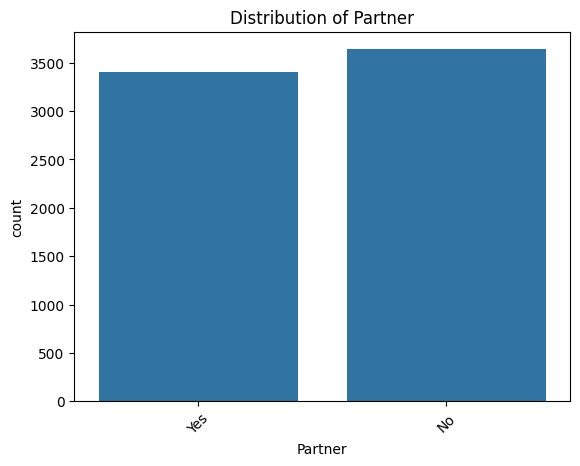

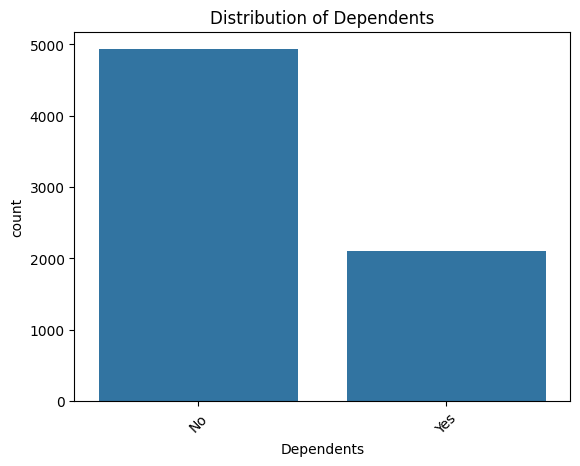

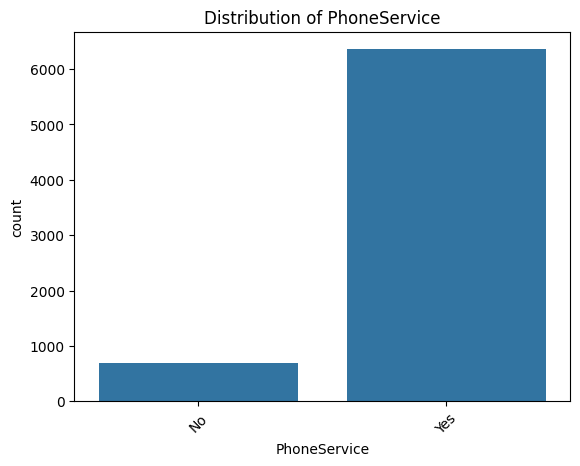

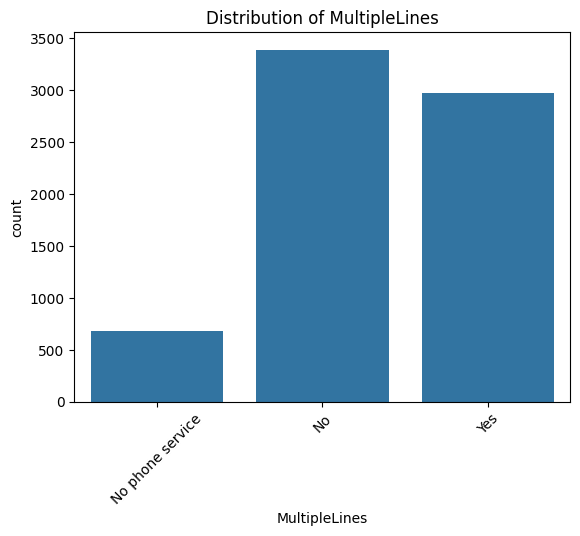

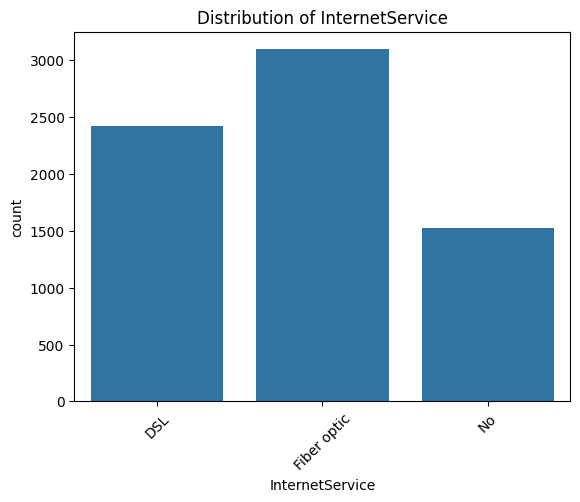

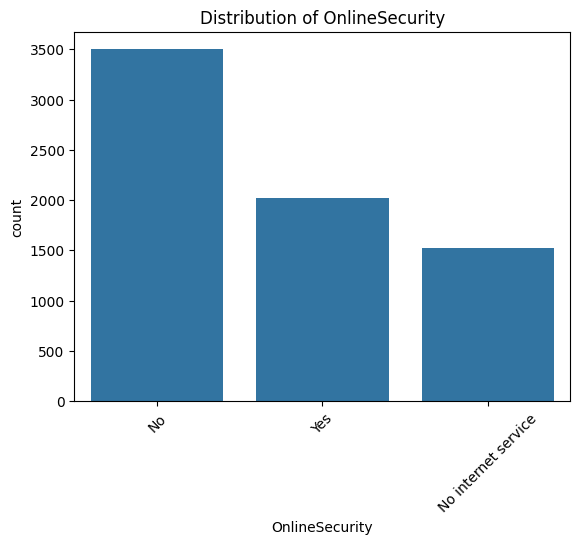

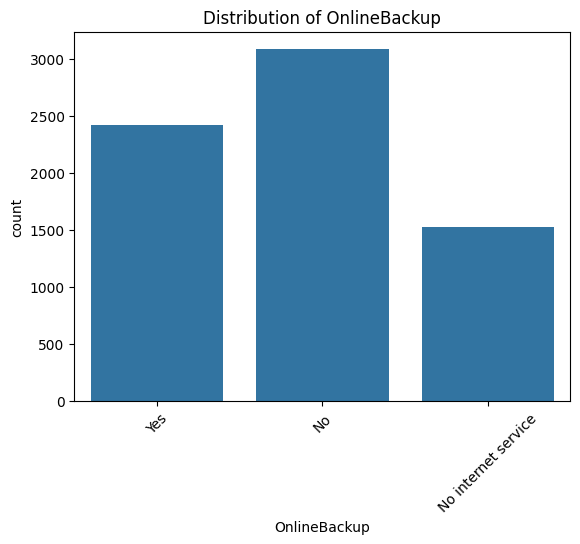

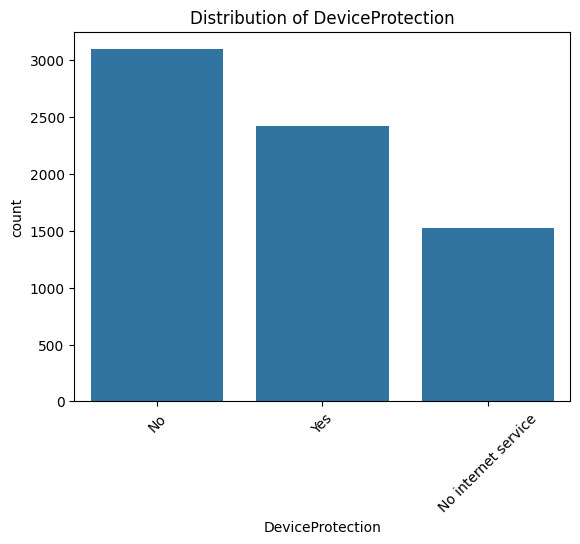

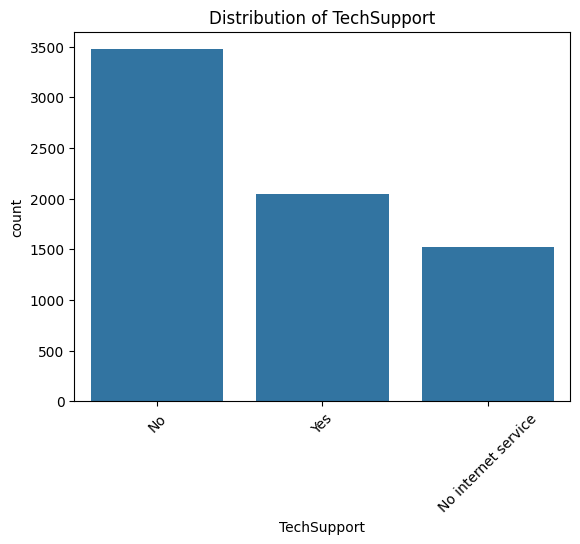

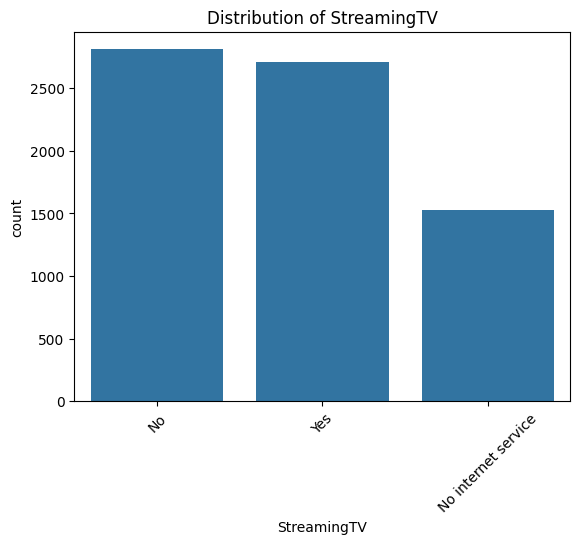

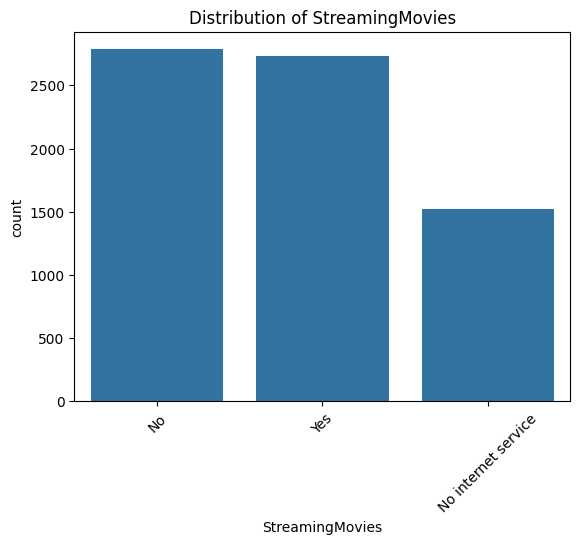

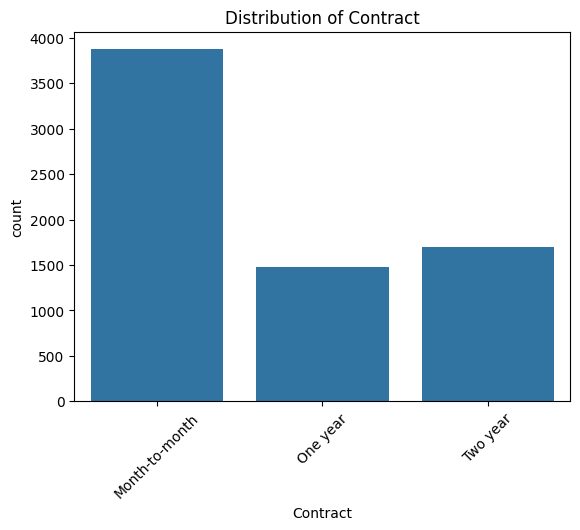

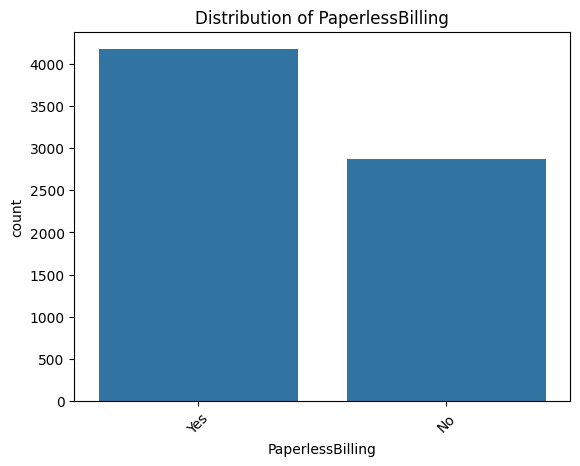

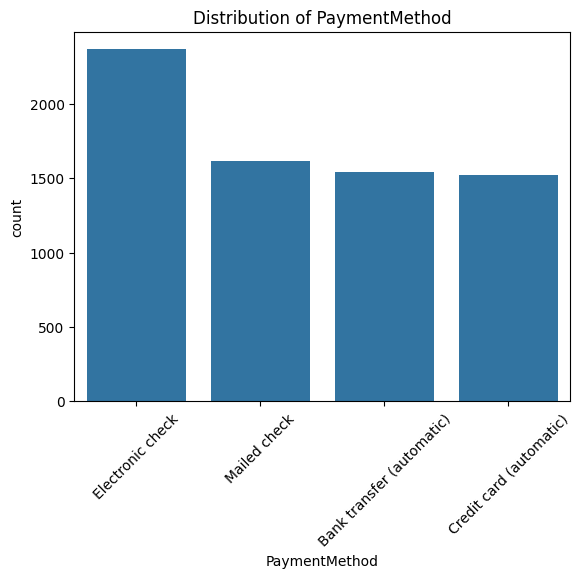

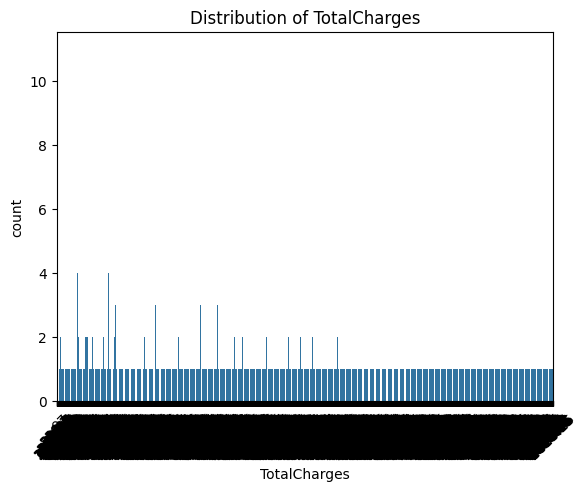

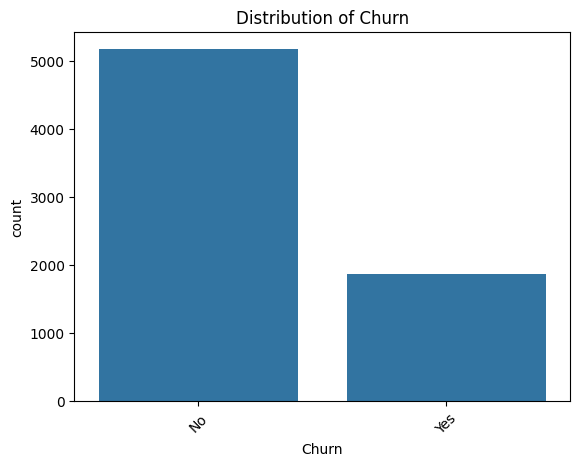

In [16]:
for col in cat_cols:
    if col != 'customerID':
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=45)
        plt.title(f"Distribution of {col}")
        plt.show()

**14. Categorical Features vs Churn**

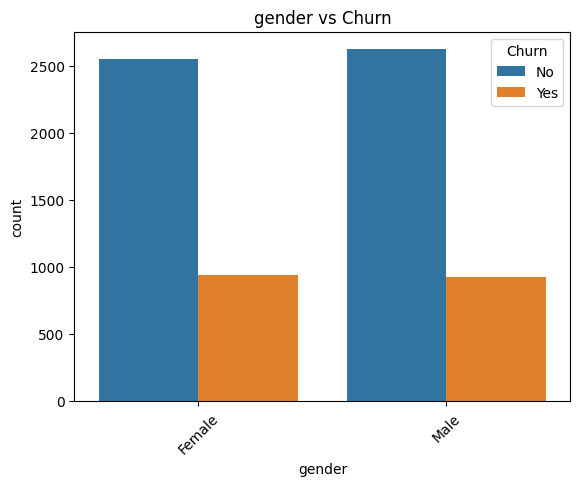

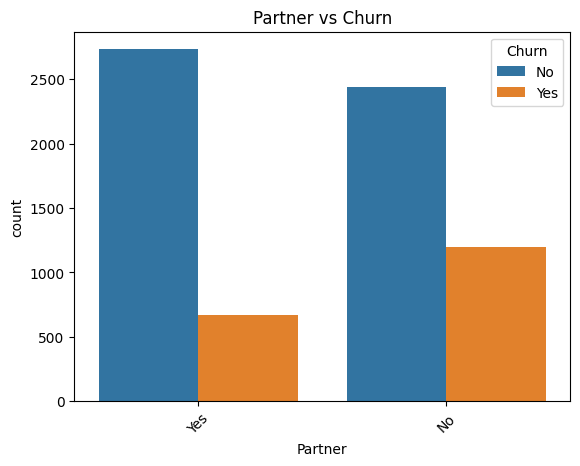

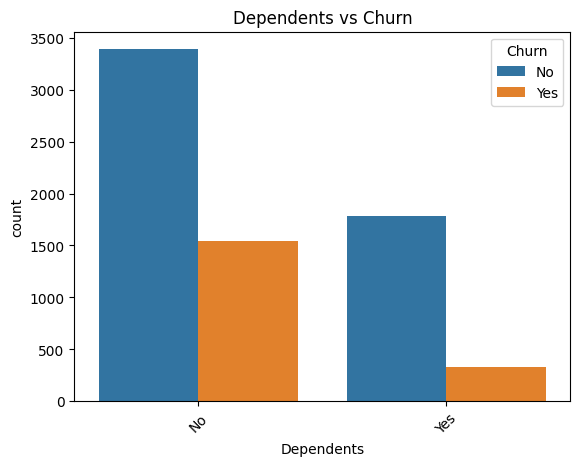

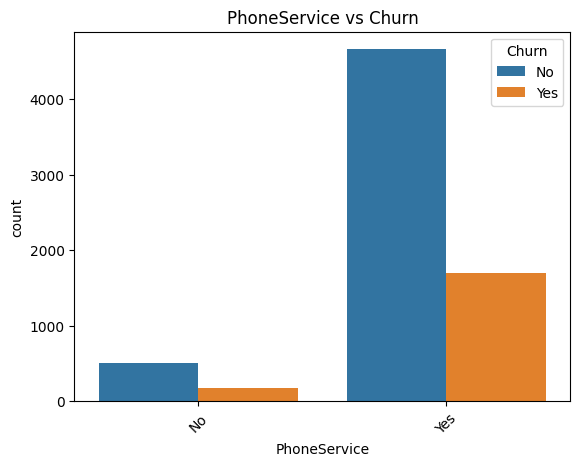

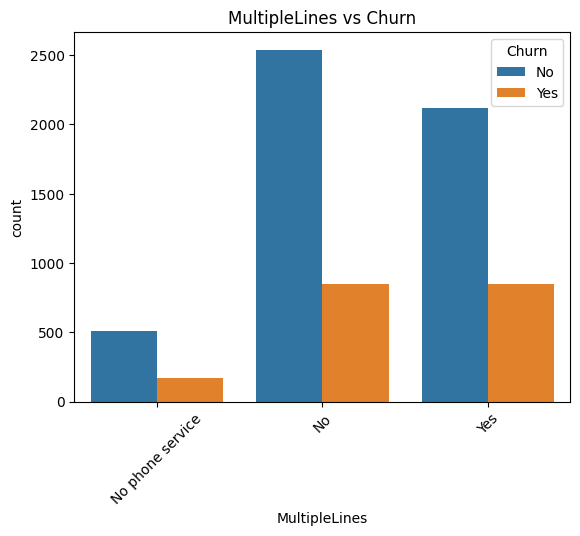

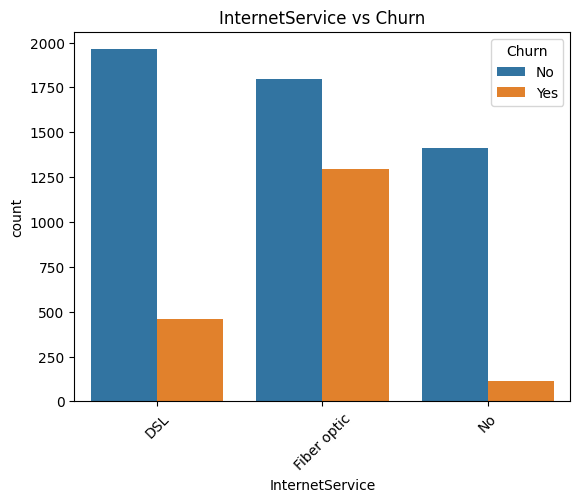

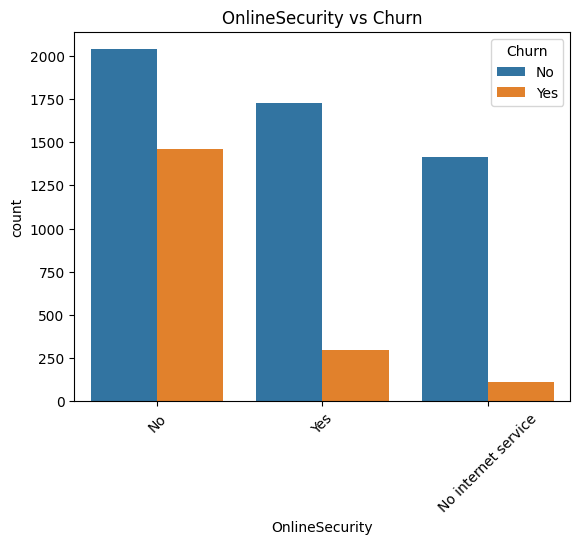

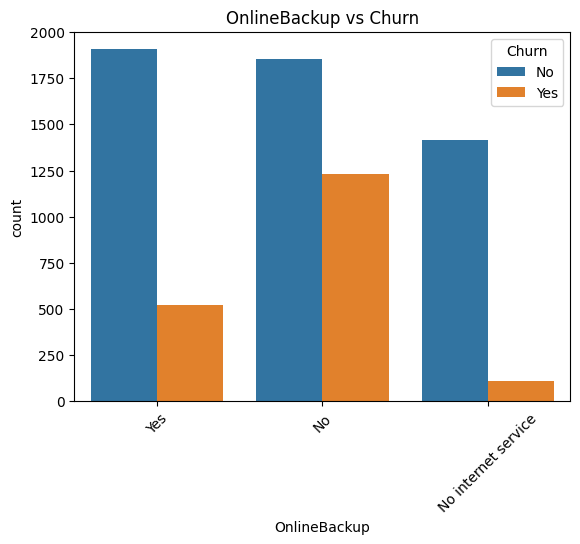

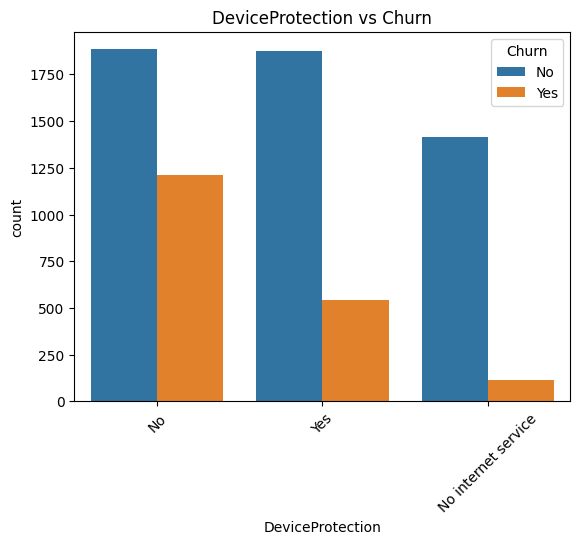

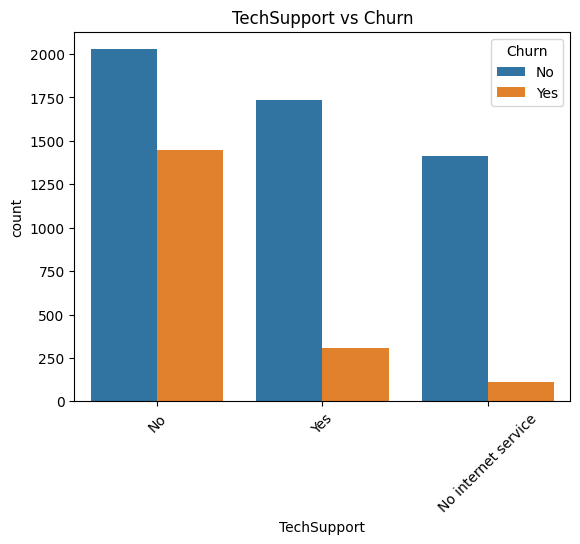

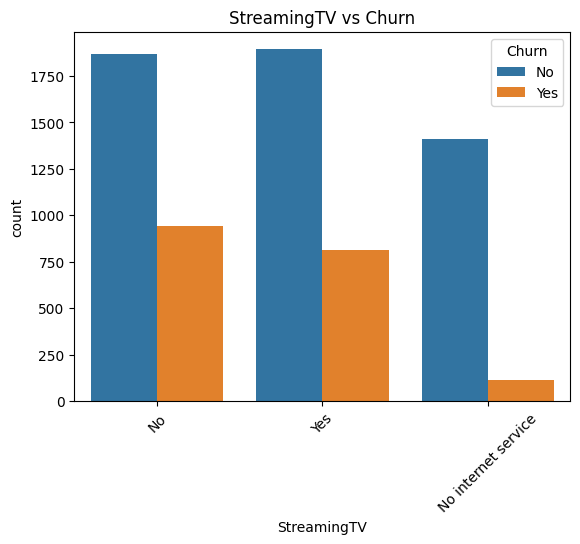

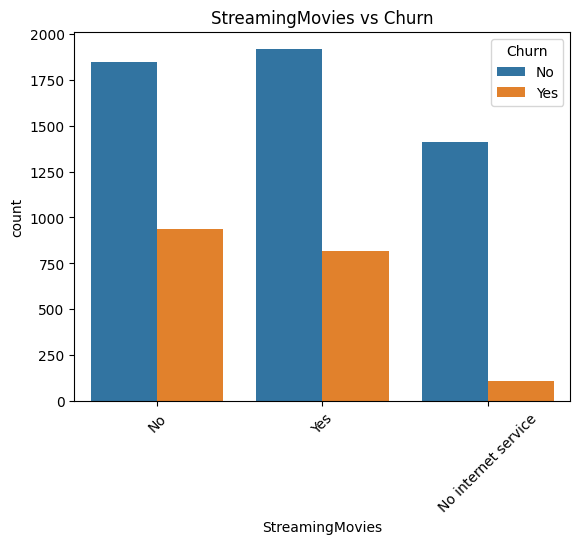

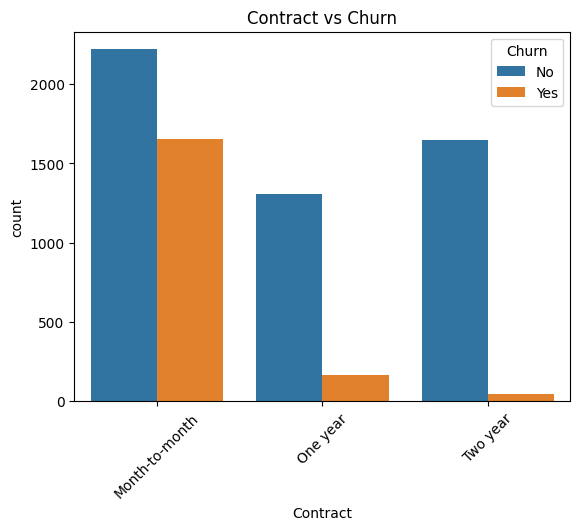

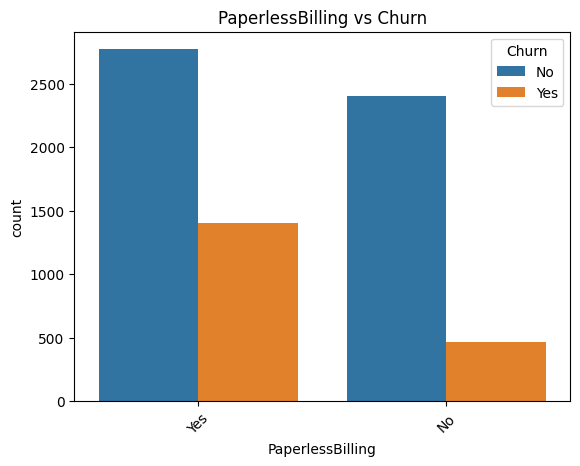

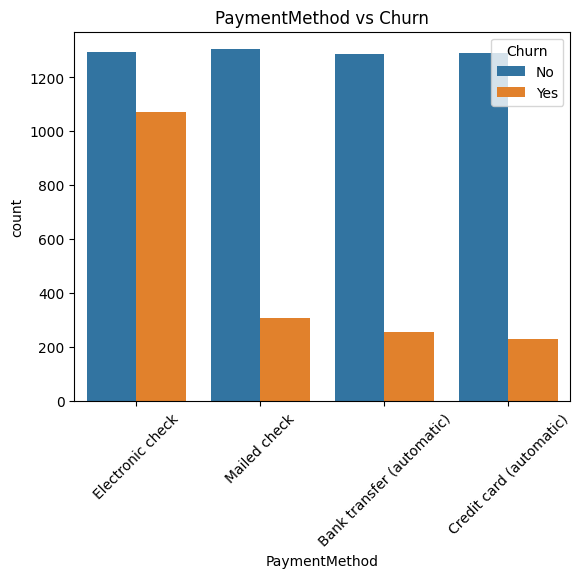

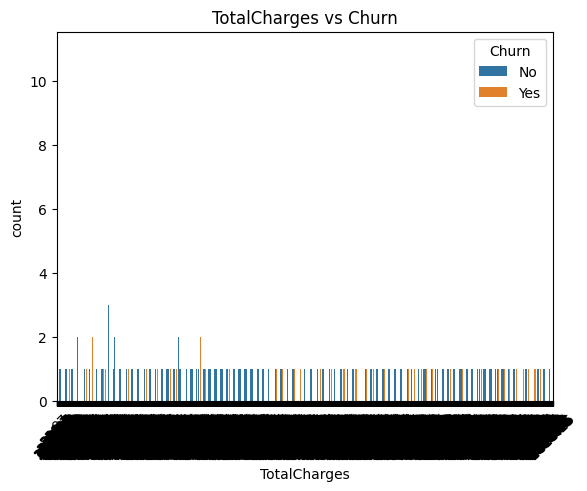

In [17]:
for col in cat_cols:
    if col not in ['customerID','Churn']:
        sns.countplot(x=col, hue='Churn', data=df)
        plt.xticks(rotation=45)
        plt.title(f"{col} vs Churn")
        plt.show()

**15. Numerical Columns**

In [18]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

**16. Numerical Columns Distribution**

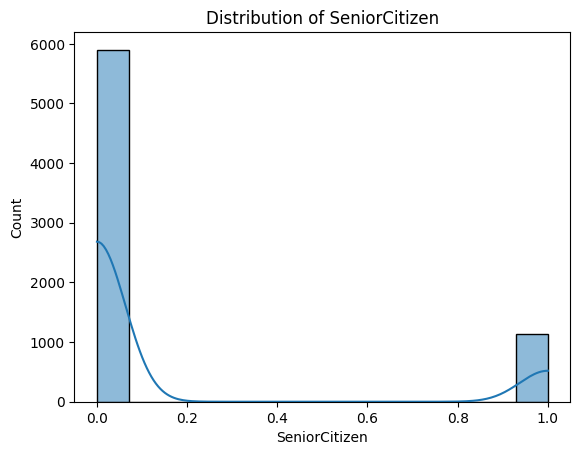

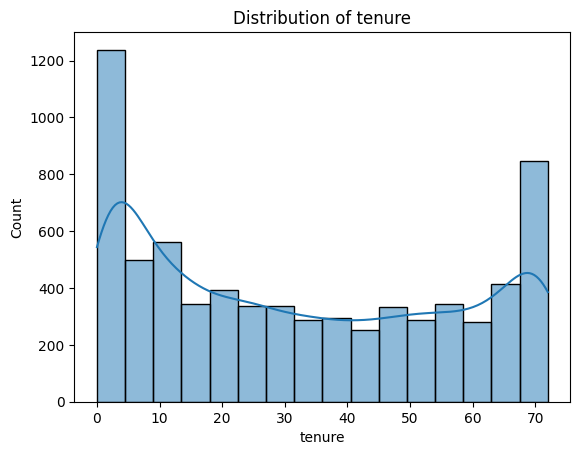

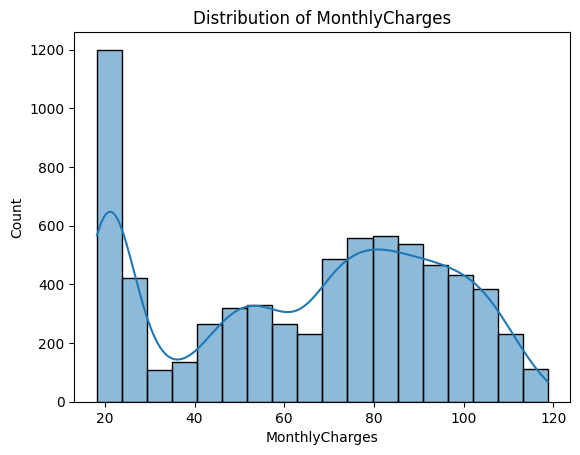

In [19]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

**17. Numerical vs Churn**

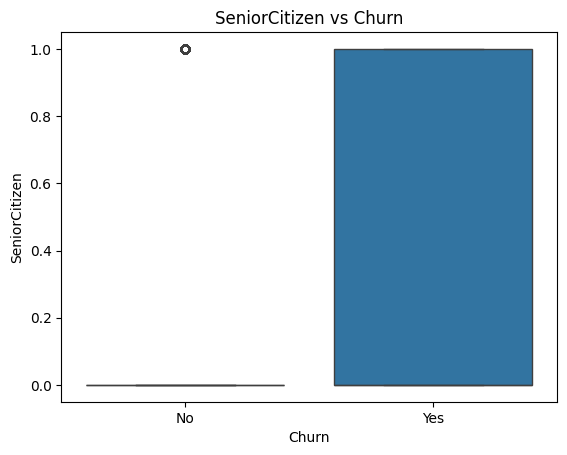

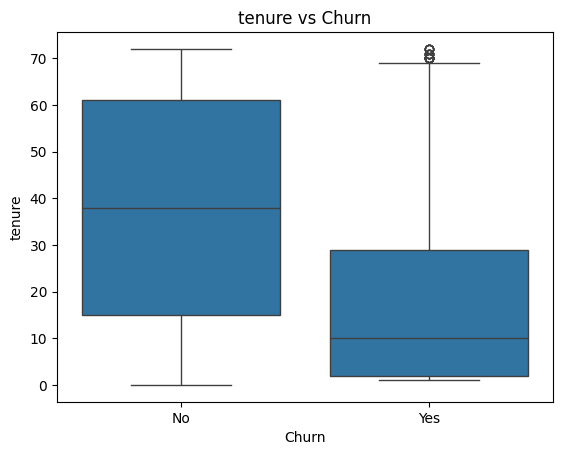

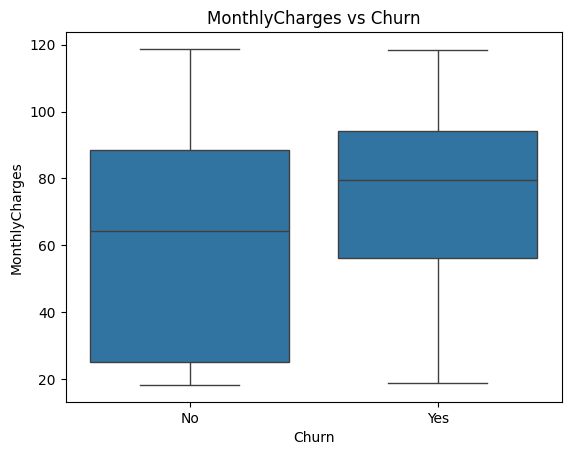

In [20]:
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

**18. Correlation Analysis**

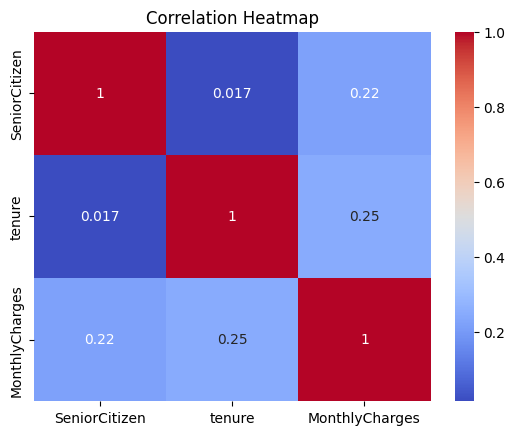

In [25]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Insight from Exploratory Data Analysis**

* The dataset contains 7,043 customer records with 20 features after removing the customerID column.

* There are no duplicate rows in the dataset.

* There are no missing values present.

* The dataset is imbalanced, with about 26.54% customers churned (Yes) and 73.46% customers not churned (No).

* Most columns are categorical (object type).

* Numerical columns include SeniorCitizen, tenure, and MonthlyCharges.

* The TotalCharges column is currently stored as an object type and needs conversion to numeric for proper analysis.

* The dataset includes customer demographic information such as gender, senior citizen status, partner status, and dependents.

* Many service-related columns contain categories like "No internet service" and "No phone service," indicating customers who do not subscribe to those services.

* Customers with month-to-month contracts show a higher churn rate compared to customers with one-year or two-year contracts.

* Customers using fiber optic internet service tend to churn more frequently than those using DSL or no internet service.

* Customers without online security, online backup, device protection, and tech support show higher churn rates.

* Customers with lower tenure (new customers) have a higher tendency to churn compared to long-term customers.

* Customers with higher monthly charges show a higher churn rate.

* SeniorCitizen has a weak positive correlation with tenure and a moderate positive correlation with MonthlyCharges.

* Tenure has a moderate positive correlation with MonthlyCharges.

* MonthlyCharges has a moderate positive correlation with both SeniorCitizen and tenure.

* Overall, churn is influenced by contract type, service usage, tenure duration, pricing level, and availability of support services, which are important factors for further analysis, feature engineering, and customer retention strategies.

